In [251]:
import numpy as np
import pandas as np

In [252]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding="latin-1")

print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [253]:
df.shape

(5572, 5)

In [254]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning 


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [256]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [257]:
df.sample(5)

,v1,v2
3038,ham,"Wishing you and your family Merry \X\"" mas and..."
2460,ham,i cant talk to you now.i will call when i can....
4292,ham,You best watch what you say cause I get drunk ...
4858,ham,"Hey, a guy I know is breathing down my neck to..."
415,ham,Whatsup there. Dont u want to sleep


In [258]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2910,ham,"Sorry,in meeting I'll call later"
2763,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
3087,ham,"'Wnevr i wana fal in luv vth my books, My bed ..."
3673,spam,You have won a Nokia 7250i. This is what you g...
2162,ham,1) Go to write msg 2) Put on Dictionary mode 3...


In [259]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [260]:
df['target']= encoder.fit_transform(df['target'])

In [261]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [262]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [263]:
# check for duplicate values 
df.duplicated().sum()

np.int64(403)

In [264]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [265]:
df.duplicated().sum()

np.int64(0)

In [266]:
df.shape

(5169, 2)

## 2.EDA

In [267]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [268]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

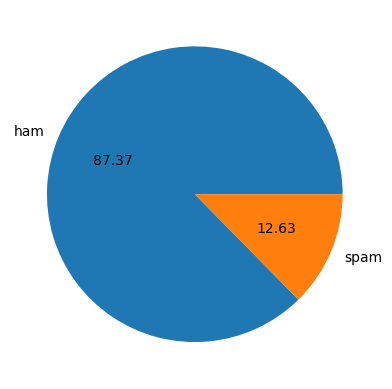

In [269]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [270]:
# Data is imbalanced 

In [271]:
import nltk

In [272]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\goram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [273]:
df['num_characters'] = df['text'].apply(len)

In [274]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [275]:
# num of words 
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [276]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [277]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [278]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [279]:
#ham 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [280]:
#spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [281]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

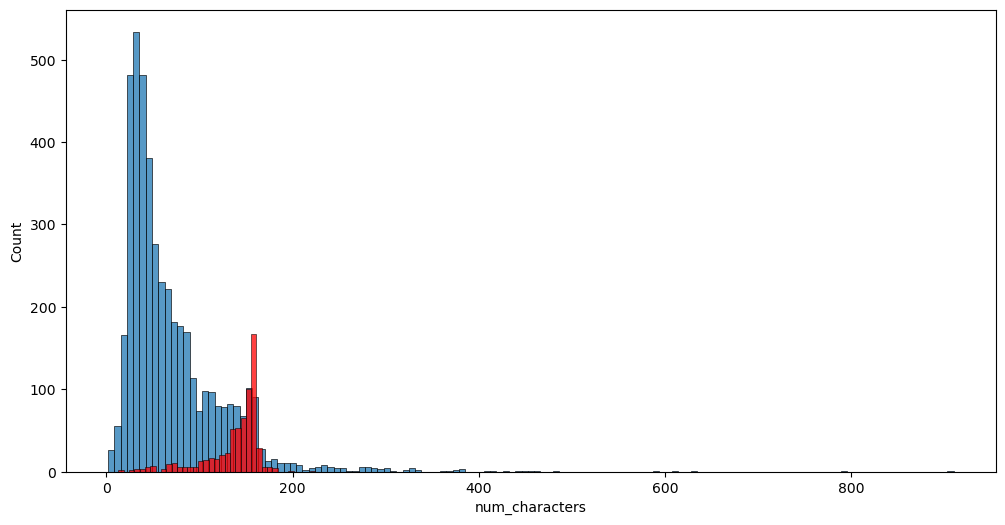

In [282]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

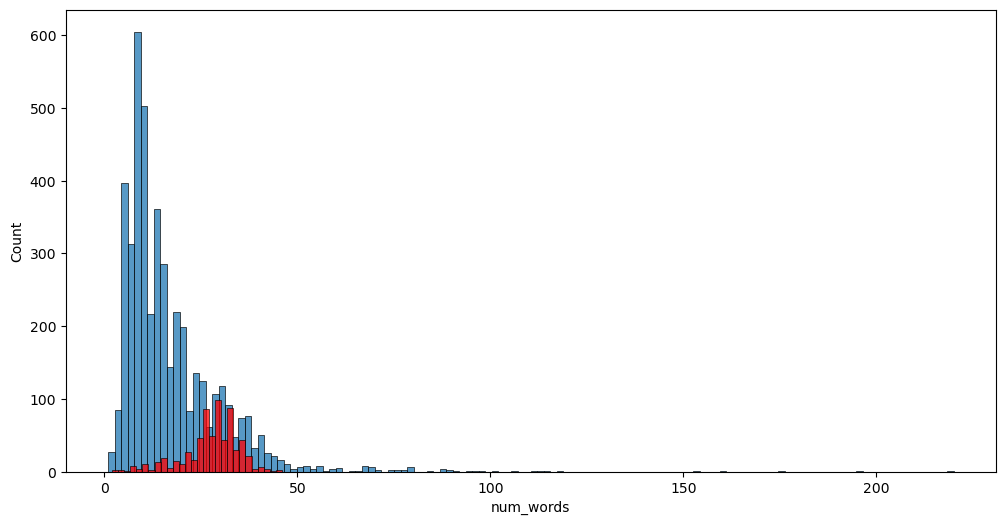

In [283]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

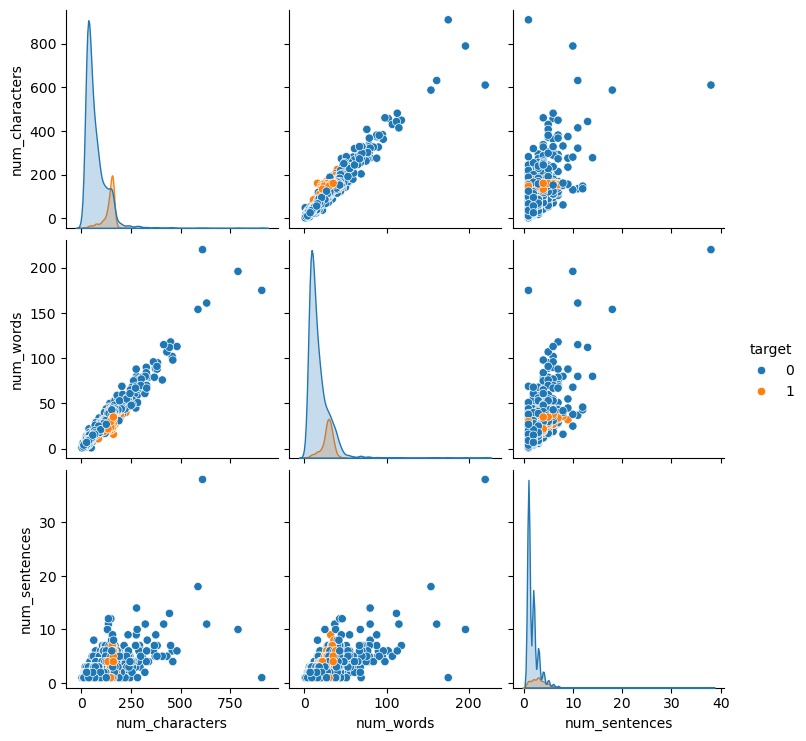

In [284]:
sns.pairplot(df,hue='target')

<Axes: >

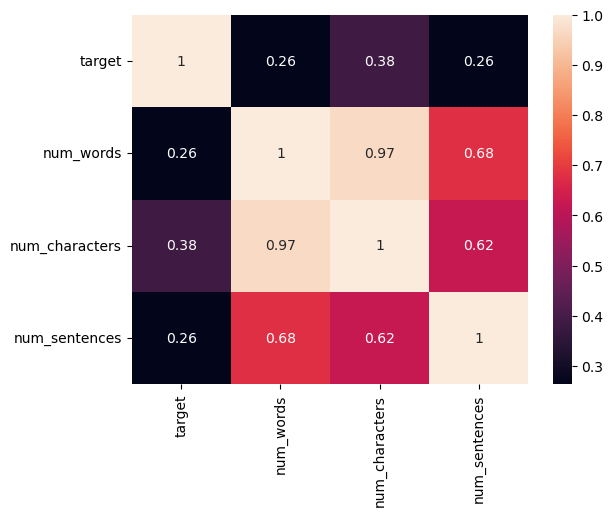

In [285]:
sns.heatmap(df[['target','num_words','num_characters','num_sentences']].corr(),annot=True)


## 3. Data Preprocessing
- Lower case  
- Tokenization  
- Removing special characters  
- Removing stop words and punctuation  
- Stemming  


In [286]:
import nltk
nltk.download('punkt')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    clean_words = []
    for i in text:
        if i.isalnum():   # keep only letters & numbers
            clean_words.append(i)
    text = clean_words[:]
    clean_words.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  # keep only letters & numbers
            clean_words.append(i)
            
    text = clean_words[:]
    clean_words.clear()
    for i in text:
        clean_words.append(ps.stem(i))
            
    return " ".join(clean_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [287]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today ")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [288]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [289]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [293]:
df['transformed_text'] = df['text'].apply(transform_text)

In [294]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [295]:
!pip install wordcloud
from wordcloud import WordCloud 
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [311]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


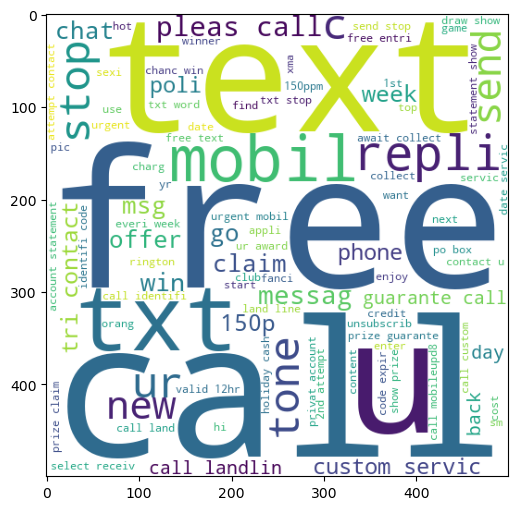

In [312]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [298]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


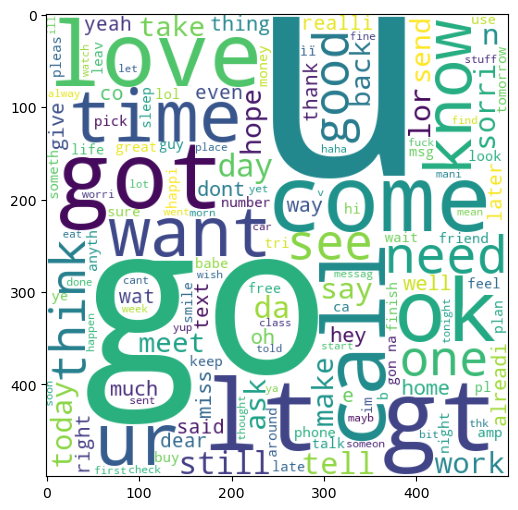

In [299]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [301]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
   for word in msg.split():
       spam_corpus.append(word)

In [302]:
len(spam_corpus)

9939

C:\Users\goram\AppData\Local\Temp\ipykernel_9232\3639583917.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count", x="word", data=word_freq, palette="viridis")


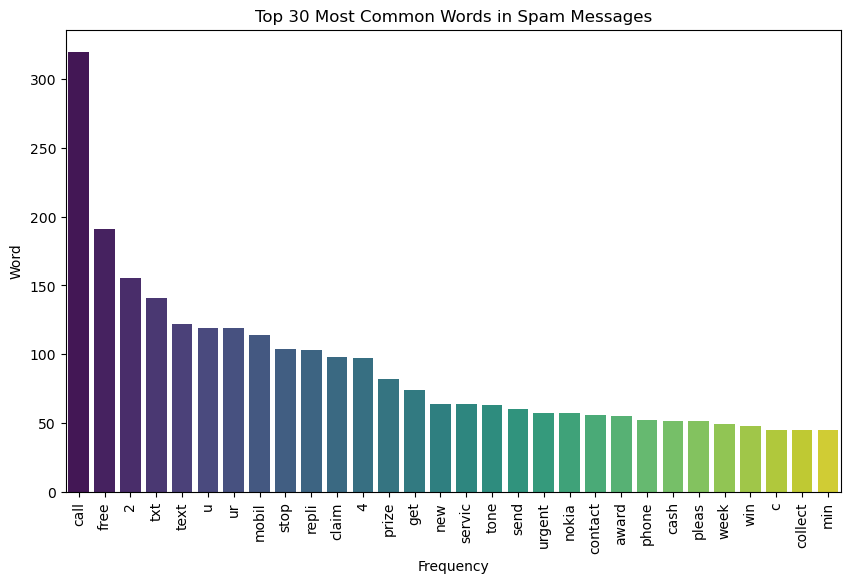

In [303]:
from collections import Counter
# 1. Count top 30 most frequent words from spam corpus
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), 
                         columns=['word', 'count'])

# 2. Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(y="count", x="word", data=word_freq, palette="viridis")
plt.title("Top 30 Most Common Words in Spam Messages")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.xticks(rotation='vertical')
plt.show()

In [304]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
   for word in msg.split():
       ham_corpus.append(word)
      

In [305]:
len(ham_corpus)

35404

C:\Users\goram\AppData\Local\Temp\ipykernel_9232\4161815469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count", x="word", data=word_freq, palette="viridis")


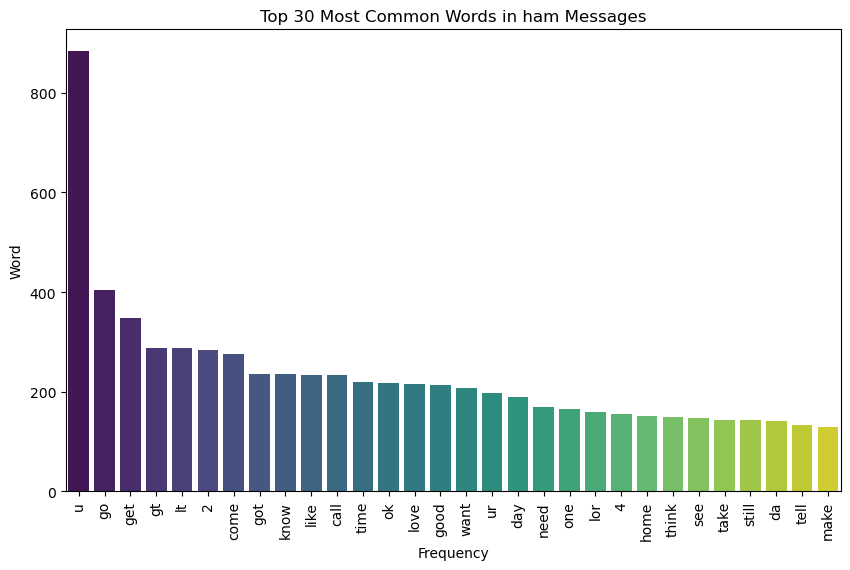

In [306]:
 word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), 
                         columns=['word', 'count'])
from collections import Counter
# 2. Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(y="count", x="word", data=word_freq, palette="viridis")
plt.title("Top 30 Most Common Words in ham Messages")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building 

In [470]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [510]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [513]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [544]:
import numpy as np   # make sure numpy is imported
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [545]:
X.shape

(5169, 3002)

In [546]:
y = df['target'].values

In [547]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [548]:
from sklearn.model_selection import train_test_split

In [549]:
X_train,X_test,y_train,y_test, = train_test_split(X,y,test_size=0.2,random_state=2)


In [550]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [551]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [552]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)) 
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8945841392649904
[[802  94]
 [ 15 123]]
0.5668202764976958


In [553]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2)) 
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[890   6]
 [ 22 116]]
0.9508196721311475


In [554]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3)) 
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [555]:
# tfidf --> MBM

In [556]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [557]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [558]:
clfs = {
       'SVC': svc,
       'KN': knc,
       'NB': mnb,
       'DT': dtc,
       'LR': lrc,
       'RF': rfc,
       'AdaBoost': abc,
       'BgC': bc,
       'ETC': etc,
       'GBDT':gbdt,
       'xgb':xgb
}

In [559]:
def train_classifier (clf, X_train,y_train, X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [560]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\goram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [561]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(
            clf, X_train, y_train, X_test, y_test
        )
        
        print(f"For {name}")
        print("Accuracy - ", current_accuracy)
        print("Precision - ", current_precision)
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        
    except Exception as e:
        print(f"⚠️ Skipping {name} due to error: {e}")
        accuracy_scores.append(None)
        precision_scores.append(None)


C:\Users\goram\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For KN
Accuracy -  0.8820116054158608
Precision -  0.8076923076923077
For NB
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For DT
Accuracy -  0.9487427466150871
Precision -  0.897196261682243
⚠️ Skipping LR due to error: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got '11' instead.
For RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For AdaBoost
Accuracy -  0.9448742746615088
Precision -  0.8932038834951457
For BgC
Accuracy -  0.9622823984526112
Precision -  0.8778625954198473
For ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [562]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [563]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.980658,0.983607
5,RF,0.972921,0.982456
2,NB,0.972921,0.950820
10,xgb,0.971954,0.943089
9,GBDT,0.949710,0.930000
3,DT,0.948743,0.897196
6,AdaBoost,0.944874,0.893204
7,BgC,0.962282,0.877863
1,KN,0.882012,0.807692
0,SVC,0.866538,0.000000


In [564]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [565]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.980658
1,RF,Accuracy,0.972921
2,NB,Accuracy,0.972921
3,xgb,Accuracy,0.971954
4,GBDT,Accuracy,0.949710
5,DT,Accuracy,0.948743
6,AdaBoost,Accuracy,0.944874
7,BgC,Accuracy,0.962282
8,KN,Accuracy,0.882012
9,SVC,Accuracy,0.866538


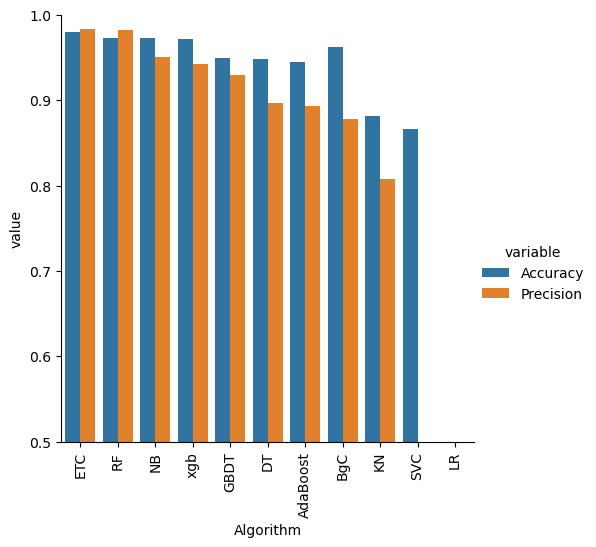

In [566]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [567]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [568]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [569]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [570]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [571]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [572]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [573]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,NB,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
3,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
4,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
5,DT,0.948743,0.897196,0.948743,0.897196,0.948743,0.897196,0.948743,0.897196
6,AdaBoost,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204
7,BgC,0.962282,0.877863,0.962282,0.877863,0.962282,0.877863,0.962282,0.877863
8,KN,0.882012,0.807692,0.882012,0.807692,0.882012,0.807692,0.882012,0.807692
9,SVC,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000


In [574]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [575]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [576]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [577]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 1.0


In [578]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [579]:
from sklearn.ensemble import StackingClassifier

In [580]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [581]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9117647058823529


In [585]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))